## Capstone #2 Feature Engineering

The botebook will cover the feature engineering for LengthofStay dataset, which contains the medical data upon admission and total length of stay (in days) at the Beth Israel ICU in 2012 for 1000 patients.  The goal of this project is to build a model using this medical data to predict the length of the patients ICU stay.  Feature engineering for this project will cover the following steps:

1. Make a new feature summing the total number of issues for binary columns.
2. Making dummy features for categorical features.
3. Scaling the continuous features.
4. Splitting the data into training and test sets.

We will not be creating any more advanced custom features from this data, as this dataset contains independent medical measurements in a single table which would require extensive domain knowledge to be safely be combined into meaningful new features.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sb_utils import save_file

In [2]:
#Read the LengthOfStay.csv file into the variable health_data
health_data = pd.read_csv('LengthOfStay_EDA.csv')
health_data.head()

,eid,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay,readmission_int
0,82815,M,0,0,0,0,0,0,0,0,...,157.260204,12.0,1.373386,30.118187,92,6.5,0,B,2,0
1,99368,M,0,0,1,0,0,0,0,0,...,168.025644,16.0,1.386766,29.007914,76,6.4,5,C,3,0
2,91182,M,0,0,0,0,0,0,0,0,...,153.090520,8.0,1.153868,26.734935,66,7.2,1,B,1,0
3,83267,M,0,0,1,0,0,0,0,0,...,150.465944,9.0,0.886126,28.077883,61,6.0,3,C,3,0
4,2956,F,0,0,0,0,0,0,0,0,...,128.574576,12.0,0.831972,32.619871,71,6.5,1,B,8,5


### New Feature: Number of Issues

Here we will create a new column called `total_issues` that is a total of the the binary features, columns 3 through 13.

In [4]:
# Make new column for sum of columns 3 thorugh 13

health_data['total_issues'] = health_data.iloc[:, 2:13].sum(axis=1)
health_data


,eid,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay,readmission_int,total_issues
0,82815,M,0,0,0,0,0,0,0,0,...,12.0,1.373386,30.118187,92,6.5,0,B,2,0,0
1,99368,M,0,0,1,0,0,0,0,0,...,16.0,1.386766,29.007914,76,6.4,5,C,3,0,1
2,91182,M,0,0,0,0,0,0,0,0,...,8.0,1.153868,26.734935,66,7.2,1,B,1,0,0
3,83267,M,0,0,1,0,0,0,0,0,...,9.0,0.886126,28.077883,61,6.0,3,C,3,0,1
4,2956,F,0,0,0,0,0,0,0,0,...,12.0,0.831972,32.619871,71,6.5,1,B,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99957,89932,M,0,0,0,0,0,0,0,0,...,12.0,1.319660,30.133891,71,6.5,0,E,1,0,0
99958,28552,F,0,0,1,0,1,1,1,0,...,19.5,1.094609,29.363911,73,7.4,1,E,8,4,4
99959,63020,F,0,0,0,0,0,0,0,0,...,12.0,1.010751,29.351833,87,6.5,3,B,3,0,0
99960,76830,M,0,0,0,1,0,1,0,0,...,11.0,1.018696,30.097941,92,4.7,2,E,7,2,2


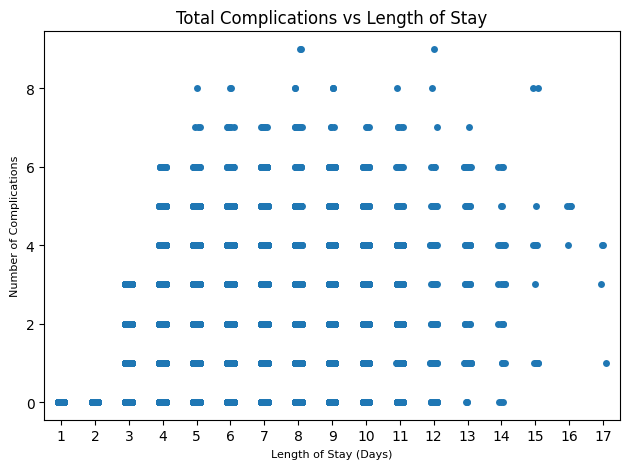

In [19]:
sns.stripplot(data=health_data, x='lengthofstay', y='total_issues', jitter=True)
plt.title('Total Complications vs Length of Stay', fontsize=12)
plt.ylabel('Number of Complications', fontsize=8)
plt.xlabel("Length of Stay (Days)", fontsize=8)

plt.tight_layout()
plt.show()

In [22]:
health_data['lengthofstay'].corr(health_data['total_issues'])

np.float64(0.41710483496466355)

### Making Dummy Features

In [5]:
#Step 1: Allocated columns into groups for categorical and continuous features.
health_data.columns

Index(['eid', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid',
       'lengthofstay', 'readmission_int', 'total_issues'],
      dtype='object')

The secondary diagnosis column are codes 1 thorugh 10.  I'm not able to determine what these codes mean at this time.  This column should be treated as a categorical column and be included in one-hot encoding.

In [6]:
health_data['secondarydiagnosisnonicd9'] = health_data['secondarydiagnosisnonicd9'].astype('str')
health_data.dtypes

eid                             int64
gender                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9      object
facid                          object
lengthofstay                    int64
readmission_int                 int64
total_issues

In [7]:
# Split features into categorical and continuous groups and divide the data frame into X_cat and X_cont.  X_cat will undergo one hot encoding and X_cont will undergo scaling.  
# They will then be put together for the final X before splitting.
cat_features = ['gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'secondarydiagnosisnonicd9', 'facid']
cont_features = ['hemo', 'hematocrit', 'neutrophils', 'sodium', 
       'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration','readmission_int', 'total_issues']
# Make an explanatory variable called X
X_cat = health_data[cat_features]
X_cont = health_data[cont_features]
# Make a dependent variable called y
y = health_data['lengthofstay']

In [8]:
# One-hot encode all features in X.
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [9]:
X_cat.columns

Index(['dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'gender_M',
       'secondarydiagnosisnonicd9_1', 'secondarydiagnosisnonicd9_10',
       'secondarydiagnosisnonicd9_2', 'secondarydiagnosisnonicd9_3',
       'secondarydiagnosisnonicd9_4', 'secondarydiagnosisnonicd9_5',
       'secondarydiagnosisnonicd9_6', 'secondarydiagnosisnonicd9_7',
       'secondarydiagnosisnonicd9_8', 'secondarydiagnosisnonicd9_9', 'facid_B',
       'facid_C', 'facid_D', 'facid_E'],
      dtype='object')

All categorical columns with more than one option were successfully encoded.  I chose to use the dummy variable encoding instead of One Hot encoding (ie I used `drop_first=True`) to ensure that none of my variables are colinear.  This will prevent issues later in the event that I try a regression model.


##  Standard Scaling

I will use the standard scaler to scale the continuous features of `health_data`.  This works by first centering each column around 0, by subtrancting the column mean from each value in a column, and then standardizing the variance by dividing each value by the column's standard deviation.

In [10]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_cont), columns=X_cont.columns, index=X_cont.index)

In [11]:
X_scaled.head()

,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,readmission_int,total_issues
0,-0.294885,-0.037366,-0.145165,0.538374,0.509979,-0.187704,1.368490,0.156024,1.593444,0.010962,-0.724748,-0.677395
1,-0.294885,1.586626,-0.481417,1.048447,0.868940,0.197016,1.435311,-0.398159,0.219460,-0.164974,-0.724748,0.234427
2,-0.294885,0.356329,-0.836349,-0.933162,0.370946,-0.572425,0.272200,-1.532698,-0.639279,1.242511,-0.724748,-0.677395
3,-0.294885,0.011846,-0.929752,-0.140542,0.283433,-0.476245,-1.064922,-0.862377,-1.068649,-0.868717,-0.724748,0.234427
4,-0.294885,-0.529484,-0.163846,-1.068499,-0.446509,-0.187704,-1.335371,1.404719,-0.209909,0.010962,2.515667,-0.677395


In [12]:
# Now put X_cat and X_scaled back together into a single dataframe.
X = pd.concat([X_cat, X_scaled], axis=1)
X.head()

,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,readmission_int,total_issues
0,0,0,0,0,0,0,0,0,0,0,...,-0.145165,0.538374,0.509979,-0.187704,1.368490,0.156024,1.593444,0.010962,-0.724748,-0.677395
1,0,0,1,0,0,0,0,0,0,0,...,-0.481417,1.048447,0.868940,0.197016,1.435311,-0.398159,0.219460,-0.164974,-0.724748,0.234427
2,0,0,0,0,0,0,0,0,0,0,...,-0.836349,-0.933162,0.370946,-0.572425,0.272200,-1.532698,-0.639279,1.242511,-0.724748,-0.677395
3,0,0,1,0,0,0,0,0,0,0,...,-0.929752,-0.140542,0.283433,-0.476245,-1.064922,-0.862377,-1.068649,-0.868717,-0.724748,0.234427
4,0,0,0,0,0,0,0,0,0,0,...,-0.163846,-1.068499,-0.446509,-0.187704,-1.335371,1.404719,-0.209909,0.010962,2.515667,-0.677395


## Split X and y into training and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=246) 

This data is now ready for model building.  I will finish by saving the resulting varaibles as csv files for the upcoming analysis.

In [14]:
# save the data to a new csv file
datapath = 'C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2'
save_file(X_train, 'LengthOfStay_Xtrain.csv', datapath)
save_file(X_test, 'LengthOfStay_Xtest.csv', datapath)
save_file(y_train, 'LengthOfStay_ytrain.csv', datapath)
save_file(y_test, 'LengthOfStay_ytest.csv', datapath)

A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtrain.csv"
A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_Xtest.csv"
A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_ytrain.csv"
A file already exists with this name.

Writing file.  "C:/Users/Ujval/OneDrive/Documents/GitHub/Springboard/Capstone_2\LengthOfStay_ytest.csv"
